In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib

sns.set_style("whitegrid")


In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.head())
print(df.info())
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

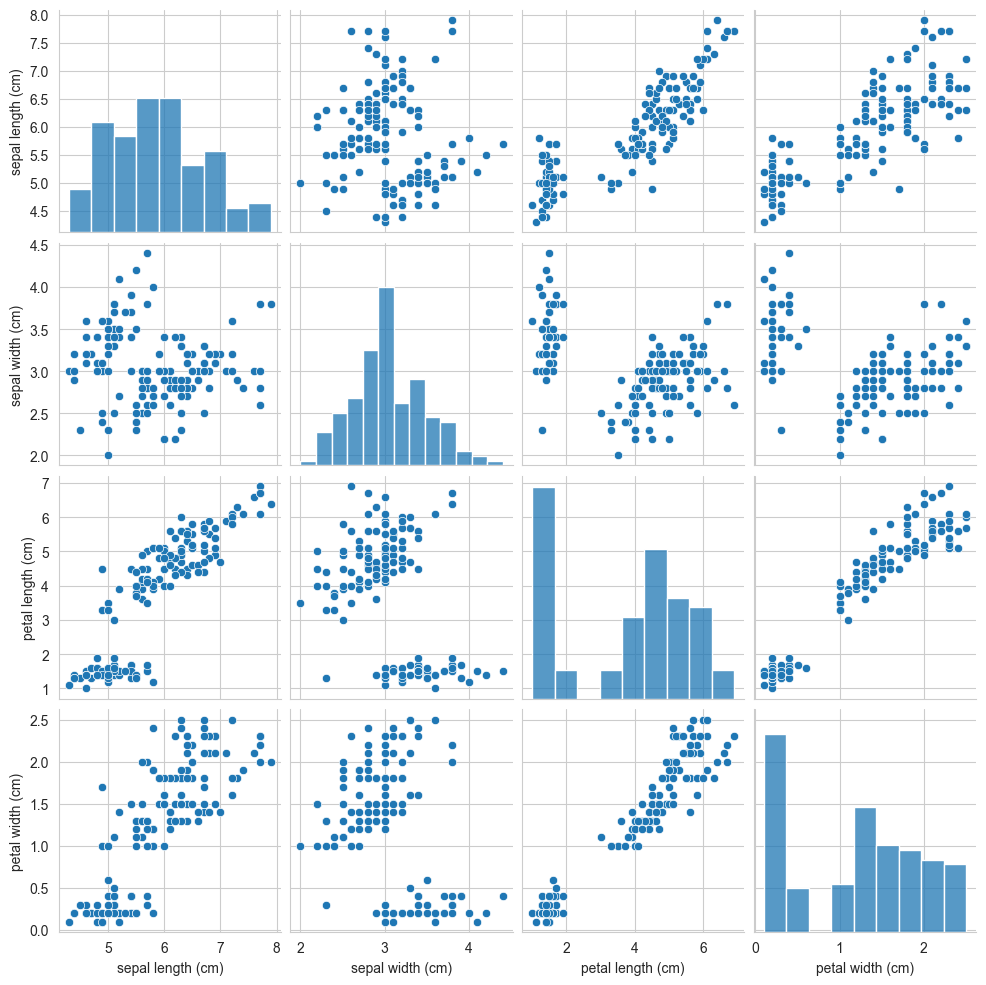

In [3]:
# Pair Plot
sns.pairplot(df)
plt.show()


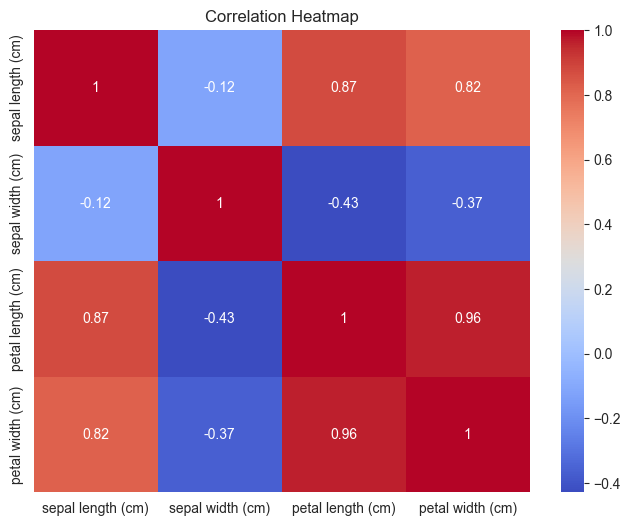

In [4]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

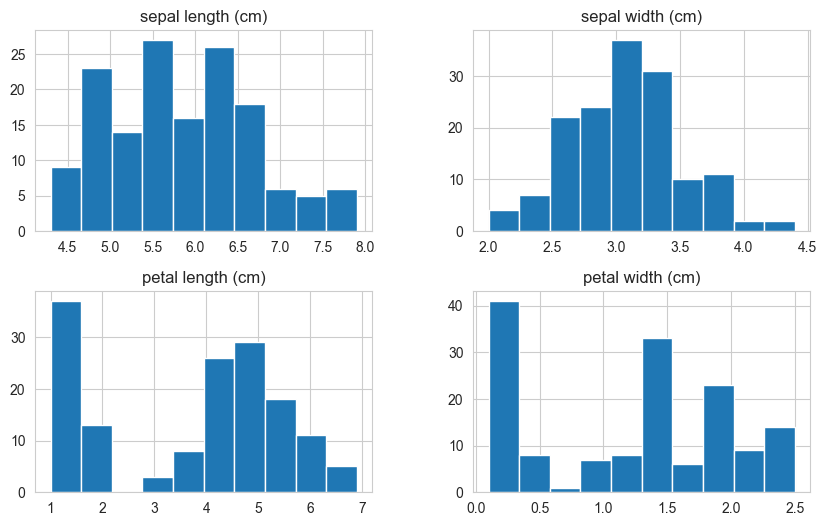

In [5]:
# Feature Distributions
df.hist(figsize=(10,6))
plt.show()

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


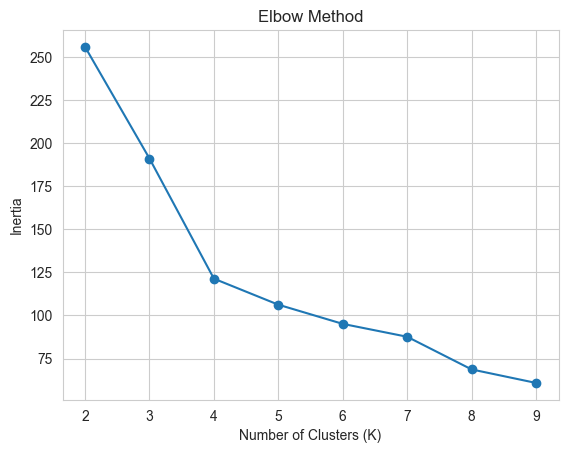

In [17]:
# Elbow Method
inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [18]:
# Silhouette Score
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"K = {k} | Silhouette Score = {score:.3f}")


K = 2 | Silhouette Score = 0.605
K = 3 | Silhouette Score = 0.590
K = 4 | Silhouette Score = 0.451
K = 5 | Silhouette Score = 0.397
K = 6 | Silhouette Score = 0.386
K = 7 | Silhouette Score = 0.370
K = 8 | Silhouette Score = 0.387
K = 9 | Silhouette Score = 0.408


In [19]:
# Train Final K-Means Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

df["Cluster"] = kmeans.labels_
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        2  
1        1  
2        1  
3        1  
4        2  


In [20]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(df.columns.tolist(), "model_columns.pkl")

print("✅ Model, scaler, and columns saved successfully")

✅ Model, scaler, and columns saved successfully


In [21]:
import streamlit as st
import numpy as np
import joblib

# Load saved files
model = joblib.load("kmeans_model.pkl")
scaler = joblib.load("scaler.pkl")
columns = joblib.load("model_columns.pkl")

st.title("🌼 Iris Flower Clustering App (K-Means)")

inputs = []
for col in columns:
    val = st.number_input(f"Enter {col}", value=0.0)
    inputs.append(val)

arr = np.array(inputs).reshape(1, -1)
arr_scaled = scaler.transform(arr)

if st.button("Predict Cluster"):
    cluster = model.predict(arr_scaled)[0]
    st.success(f"🌟 Predicted Cluster: {cluster}")

2025-12-19 13:36:32.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.042 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:36:32.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar